# Introduction
In this assignment, we analyse signals using the Fast Fourier transform, or the FFT for short. The FFT is a fast implementation of the Discrete Fourier transform(DFT). We use the numpy.fft module. We also attempt to approximate the continuous time fourier transform of a gaussian by windowing and sampling in time domain, and then taking the DFT. We will increase number of samples and size of window till we obtain a required accuracy.

In [115]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Assignment Questions
## Question 2 : Spectrum of $sin^3t$


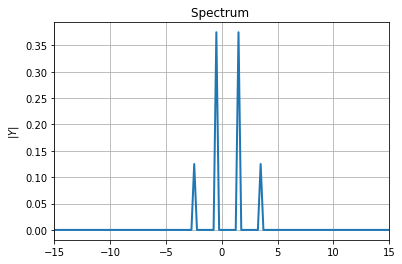

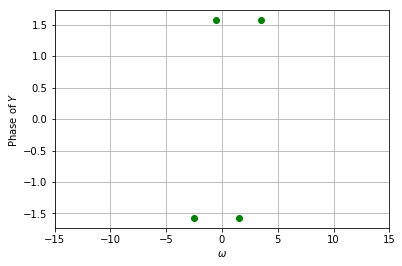

In [121]:
t=np.linspace(-4*np.pi,4*np.pi,513)
t=t[:-1]
y=(np.sin(t))**3
Y=np.fft.fftshift(np.fft.fft(y))/512
w=np.linspace(-63,64,513)
w=w[:-1]
plt.figure()
plt.plot(w,abs(Y),lw=2)
plt.xlim([-15,15])
plt.ylabel(r"$|Y|$")
plt.title(r"Spectrum ")
plt.grid(True)
plt.show()
i=np.where(np.abs(Y)>1e-3)
plt.plot(w[i],np.angle(Y[i]),'go',lw=2)
plt.xlim([-15,15])
plt.ylabel(r"Phase of $Y$")
plt.xlabel(r"$\omega$")
plt.grid(True)
plt.show()



We observe the peaks in the magnitude at the expected frequencies of 1 and 3, along with the amplitudes 0.75 and 0.25 respectively as expected.


## Spectrum of $cos^3t$

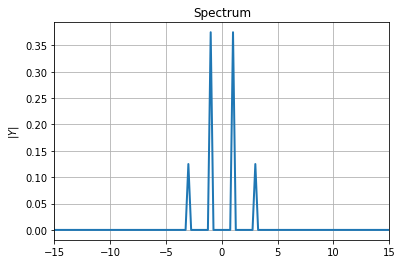

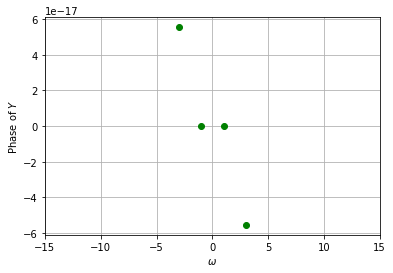

In [132]:
t=np.linspace(-4*np.pi,4*np.pi,513)
t=t[:-1]
y=(3*np.cos(t)+np.cos(3*t))/4
Y=np.fft.fftshift(np.fft.fft(y))/512
w=np.linspace(-64,64,513)
w=w[:-1]
plt.figure()
plt.plot(w,abs(Y),lw=2)
plt.xlim([-15,15])
plt.ylabel(r"$|Y|$")
plt.title(r"Spectrum")
plt.grid(True)
plt.show()
i=np.where(np.abs(Y)>1e-1)
plt.plot(w[i],np.angle(Y[i]),'go',lw=2)
plt.xlim([-15,15])
plt.ylabel(r"Phase of $Y$")
plt.xlabel(r"$\omega$")
plt.grid(True)
plt.show()

In [133]:
i


(array([244, 252, 260, 268]),)

We observe the peaks in the magnitude at the expected frequencies of 1 and 3, along with the amplitudes 0.75 and 0.25 respectively as expected.


# Question 3: Frequency Modulation

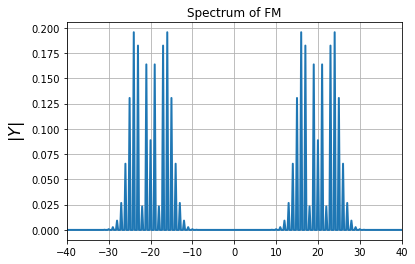

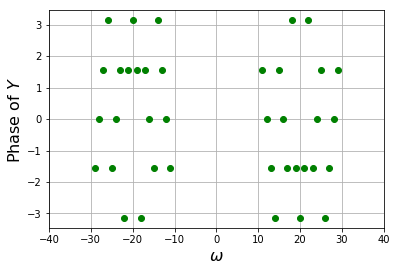

In [118]:
t=np.linspace(-4*np.pi,4*np.pi,513)
t=t[:-1]
y=np.cos(20*t + 5*np.cos(t))
Y=np.fft.fftshift(np.fft.fft(y))/512
w=np.linspace(-64,64,513)
w=w[:-1]
plt.figure()
plt.plot(w,abs(Y),lw=2)
plt.xlim([-40,40])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of FM")
plt.grid(True)
plt.show()

ii=np.where(np.abs(Y)>1e-3)
plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
plt.xlim([-40,40])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.show()

Above plots are the magnitude and phase plots of spectrum in FM case.

## Question 4: Guassian
The Gaussian $e^{−t^2/2}$ is not “bandlimited” in frequency. We want to get its spectrum accurate to 6 digits, by different time ranges, and see what gets us a frequency domain that is so accurate. As the FFT method messes up here due to wrong initial value of t, we use np.fft.iiftshift()

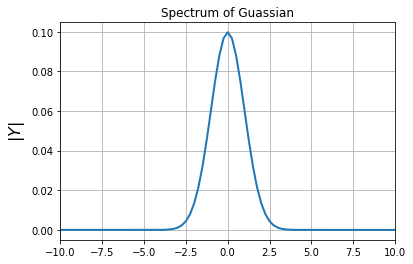

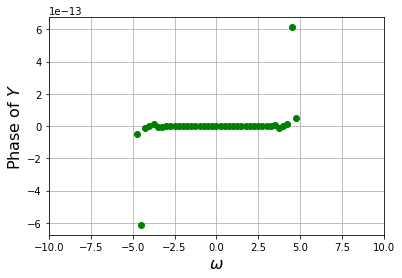

In [129]:
t=np.linspace(-4*np.pi,4*np.pi,129);t=t[:-1]
y=np.exp(-t**2/2)
Y=np.fft.fftshift(np.fft.fft(np.fft.ifftshift(y)))/128
w=np.linspace(-16,16,129)
w=w[:-1]
plt.figure()
plt.plot(w,abs(Y),lw=2)
plt.xlim([-10,10])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of Guassian")
plt.grid(True)
plt.show()

ii=np.where(np.abs(Y)>1e-6)
plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
plt.xlim([-10,10])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.show()

We arrive at above sampling rate and number of samples by checking the accuracy each and every time by calculating error from ideal case in a loop and changing them.

Error at N= 128 is 3.5686271076686083e-14
min error =3.5686271076686083e-14
Values of T,N are 25.132741228718345 128.0


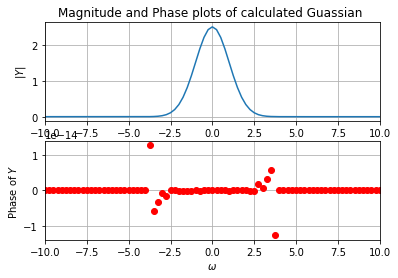

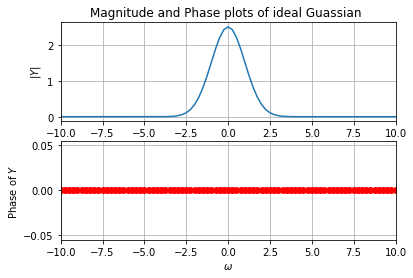

In [130]:
def ideal(w):
    return (np.sqrt(2*np.pi)) * (np.exp((-w*w)/2))
T = 8*np.pi
N = 128
error = 1
while error>1e-6:
    t = np.linspace(-T/2,T/2,N+1)[:-1]
    w = np.pi* np.linspace(-N/T,N/T,N+1)[:-1]
    Y1 = (T/N) * np.fft.fftshift(np.fft.fft(np.fft.ifftshift(np.exp(-t*t/2))))
    error = sum(np.abs(Y1-ideal(w)))
    print("Error at N=",N,"is",error)
    N = N*2
    T = T*2
print("min error =" + str(error))
print("Values of T,N are",T/2,N/2)
fig,a = plt.subplots(2)
a[0].plot(w,abs(Y1)*(1))
a[0].set_xlim([-10,10])
a[0].grid(True)
a[0].set_ylabel(r"$|Y|$")
a[0].set_xlabel(r"$\omega$")
a[0].set_title(r"Magnitude and Phase plots of calculated Guassian ")
ii = np.where(abs(Y1)<10**-3)
phase = np.angle(Y1)
phase[ii] =0
a[1].plot(w,phase,"ro")
a[1].set_xlim([-10,10])
a[1].grid(True)
a[1].set_ylabel(r"Phase of $Y$")
a[1].set_xlabel(r"$\omega$")
plt.show()
fig2,b = plt.subplots(2)
b[0].plot(w,abs(ideal(w)))
b[0].set_xlim([-10,10])
b[0].grid(True)
b[0].set_ylabel(r"$|Y|$")
b[0].set_xlabel(r"$\omega$")
b[0].set_title(r"Magnitude and Phase plots of ideal Guassian ")
b[1].plot(w,np.angle(ideal(w)),"ro")
b[1].set_xlim([-10,10])
b[1].grid(True)
b[1].set_ylabel(r"Phase of $Y$")
b[1].set_xlabel(r"$\omega$")
plt.show()